# Przygotowanie

Przygotowanie Przed rozpoczęciem pracy z notatnikiem proszę zmienić jego nazwę dodając na początku numer albumu, imię i nazwisko. {nr_albumu}_{imię}_{nazwisko}_{nazwa}

Po wykonaniu wszystkich zadań proszę przesłać wypełniony notatnik przez platformę TEAMS.

# Drzewa decyzyjne

Podobnie jak w przypadku maszyny wektorów nosnych (SVC), drzewa decyzyjne sa wszechstronnym algorytmem uczenia maszynowego. Mogą słuzyc do rozwiazywania problemów zarówno klasyfikacji, jak i regresji. W przeciwieństwie do modelu SVC drzewa decyzyjne nie wymagają restrykcyjnego przygotowania danych (np. skalowania cech). Drzewa decyzyjne składaja sie z korzenia oraz gałezi prowadzacych do kolejnych wierzchołków. W wezłach - wierzchołkach z których wychodzi co najmniej jedna krawedź, sprawdzany jest pewien warunek. Na jego podstawie, wybierana jest gałaz prowadząca do kolejnego wierzchołka. Dana obserwacja zostaje zaklasyfikowana do konkretnej klasy po przejściu od korzenia do liscia i przypisaniu do tej obserwacji klasy, z danego liscia (nie wychodza z niego wezły potomne).

Za pomocą drzew decyzyjnych otrzymać możemy potężne modele zdolne do nauki złożonych zbiorów danych.

###  Las losowy

Klasyfikator lasu losowego jest klasyfikatorem zespołowym złozonym z drzew decyzyjnych. Klasyfikator ten wprowadza dodatkową losowość do wzrostu drzew. Nie wyszukuje on najlepszej cechy podczas podziału na wezły, ale szuka najlepszej cechy wsród losowego podziału cech. Powoduje to wieksze zróznicowanie powstałych w klasyfikatorze drzew. Losowe lasy są bardziej odporne na nadmierne dopasowanie się do zbioru treningowego, jakie spotykane jest podczas użycia drzew decyzyjnych.

In [1]:
import pandas as pd
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [2]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{np.int64(0): np.int64(50),
 np.int64(1): np.int64(50),
 np.int64(2): np.int64(50)}

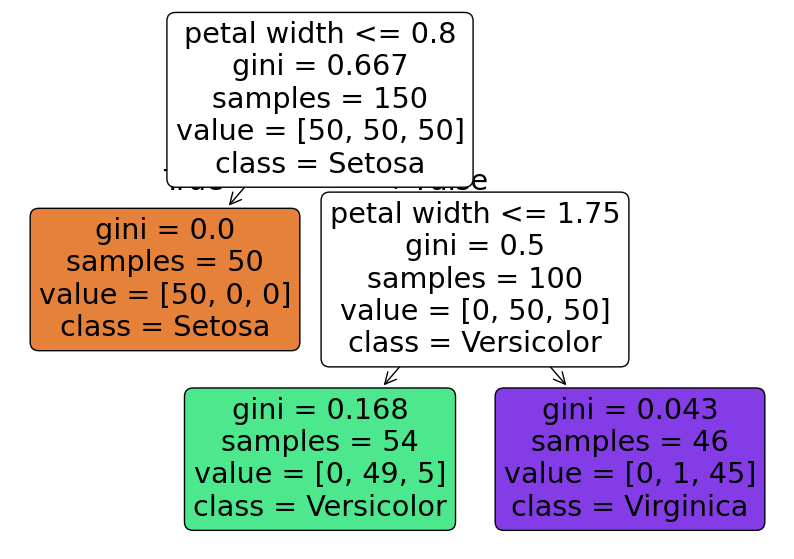

In [4]:
import matplotlib.pyplot as plt
#from pydotplus import graph_from_dot_data
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from sklearn.tree import plot_tree

tree = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=1)
tree.fit(X, y)

plt.figure(figsize=(10, 7))

plot_tree(tree, 
          filled=True, 
          rounded=True,
          class_names=['Setosa', 
                       'Versicolor',
                       'Virginica'],
          feature_names=['petal length', 
                         'petal width']) 

plt.show()

### Jak podejmowane są decyzje w drzewie?

Klasyfikacja próbki zaczyna się zawsze od korzenia (węzeł na samej górze grafu). W węźle zadawane jest pytanie (w przykładnie powyżej czy długość płatka jest mniejsza od 0.8). Jeśli prawda przechodzimy do węzła potomnego lewego, w przeciwnym razie do prawego. Przechodząc do węzła lewego dochodzimy do **liścia** (leaf node, nie posiada węzłów potomnych) - w taki wypadku żadne pytanie nie jest zadawane, przydzielana jest już tylko klasa do danej obserwacji. 

W przypadku, gdy skierujemy się ku węzłowi prawemu (nie jest już liściem) zadajemy kolejne pytanie, aż dojdziemy do liścia.

Znaczenie atrybutów:

- *samples* - oznacza ilość wyznaczonych próbek dla danego węzła (zgadza się to w przedstawionym przypadku z ilością próbek dla danych klas)
- *value* - określa ilość przykładów uczących z każdej klasy jakie przynależą do danego węzła.
- *gini* - miara zanieczyszczenia węzła (0 oznacza, że wszystkie próbki w węźle należą do jednej klasy - idealna klasyfikacja)

Wskaźnik Gingiego:
    \begin{equation*}
 G_{i} = 1 - \sum_{k=1}^{n} p_{i, k}^{2}
\end{equation*}
gdzie $p_{i,k}$ oznacza współczynie występowania klas k, wśród próbek uczących w węźle i.

Jako wskaźnik zanieczyszczenia (parametr *entropy*), użyta może zostać również miara entropii. Wynosi ona 0, w przypadku, gdy wszystkie informacje są takie same - wszystkie próbiki w węźle należą do jednej klasy.

Entropia:
    
\begin{equation*}
    H_{i} = - \sum_{k=1\\ p_{i,k} \neq 0}^{n} p_{i, k} log(p_{i,k})
\end{equation*}


Różnice pomędzy tymi dwoma miarami są zazwyczaj bardzo znikome i nie wypływają znacząco na skuteczność działania klasyfikatora. Dla zainteresowanych szczegółami zapraszam do lektury: https://sebastianraschka.com/faq/docs/decision-tree-binary.html, https://towardsdatascience.com/the-simple-math-behind-3-decision-tree-splitting-criterions-85d4de2a75fe

W jakim momencie przestać budować drzewo decyzyje?

Problemy rozważane w uczeniu maszynowym mają zazwyczaj sporą liczbę cech, która może powodować wysoko rosnące skomplikowanie drzewa (jego wielkość, sporą ilość węzłów oraz podziałów w węzłach). Tak utworzone drzewa mogą powodować nadmierne dopasowanie do danych treningowych.

Algorytm drzewa decyzyjnego posiada parametry, które ustalane są podczas uczenia. Jak wspomniano, może powodować to przetrenowanie klasyfikatora (nadmierne dopasowanie do danych uczących). Aby tego uniknąć, dobrym rozwiązaniem okazuje się ograniczenie swobody działania klasyfikatora. Podobnie jak w przypadku klasyfikatora SVC, również dla drzewa decyzyjnego zdefinowane zostały parametry regularyzacyjne:

- *max_depth* - maksymalna wysokość drzewa
- *min_samples_split* - minimalna liczba próbek, jakie będą w węźle (przed podziałem)
- *min_samples_leaf* - minimalna liczba próbek, jakie będą w liściu
- *max_leaf_nodes* - maksymalna ilość liści
- *max_features* - maksymalna liczba cech używana do dzielenia węzła.

Modyfikacja tych parametrów powoduje regularyzację drzewa i zmniejsza ryzyko przetrenowania.

## Zadania

### Zadanie 1

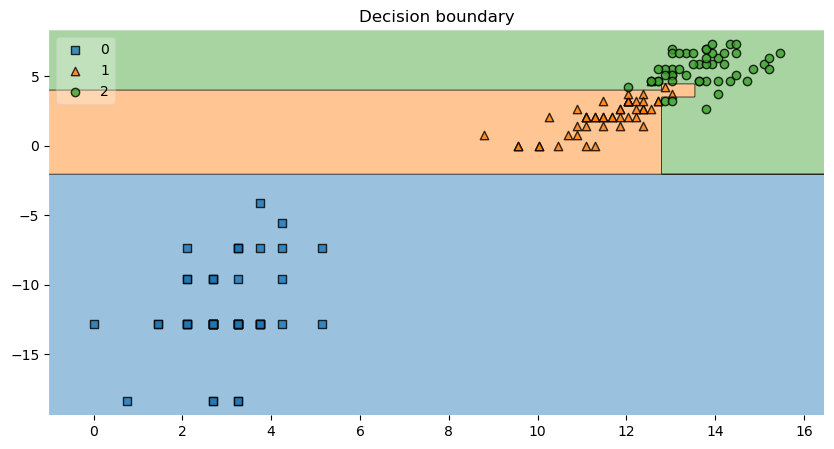

In [5]:
from mlxtend.plotting import plot_decision_regions

tree = DecisionTreeClassifier(max_depth=10, criterion="entropy", random_state=1)
tree.fit(np.log(X ** 8), y)
fig = plt.figure(figsize=(10,5))
labels = ['Decision Tree']
fig = plot_decision_regions(X=np.log(X ** 8), y=y, clf=tree, legend=2)
plt.title("Decision boundary")
plt.show()

Jakie wnioski możne sformuować na bazie granic decyzyjnych przedstawionych powyżej? W momencie pojawianie się dodatkowej próbki klasy *zielonej* (2), zostanie ona dobrze sklasyfikowana? Czy klasyfikator posiada dobre właściwości generalizujące?

Wnioski:
- Model bardzo dobrze radzi sobie z klasyfikacją klasy niebieskiej (0) na podstawie zmiennej na osi y - klasa jest wyraźnie oddzielona od dwóch pozostałych
- Natomiast dla klasy pomarańczowej i zielonej model utworzył bardziej skomplikowaną granicę - wydzielono dodatkowy, mały prostokąt dla klasy 1 w okolicach x=13, co wskazuje na potencjalny overfitting (nadmierne dostosowanie do zbioru treningowego, niska generalizacja). 
- Przy pojawieniu się dodatkowej zielonej próbki byc może  nie zostanie zaklasyfikowana poprawnie jeśli wpadnie w wyżej wspomniany mały prostokąt - overfitting
- Aby poprawić model należałoby zastosować przycinanie albo limit minimalnej ilości próbek w liściach

### Zadanie 2

Proszę o wczytanie, opisanie zbioru danych: https://www.kaggle.com/datasets/mathchi/diabetes-data-set. Proszę o usunięcie danych None. Zbiór danych powinien być użyty do dalszych oblicze

In [6]:
import kagglehub
import os

path = kagglehub.dataset_download("mathchi/diabetes-data-set")

csv_path = os.path.join(path, "diabetes.csv")
diabetes = pd.read_csv(csv_path)
diabetes.head()

d:\anaconda3\envs\mlxtend_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


For Each Attribute: (all numeric-valued)
- Number of times pregnant
- Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- Diastolic blood pressure (mm Hg)
- Triceps skin fold thickness (mm)
- 2-Hour serum insulin (mu U/ml)
- Body mass index (weight in kg/(height in m)^2)
- Diabetes pedigree function
- Age (years)
- Class variable (0 or 1 - 1 as tested positive)

In [7]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


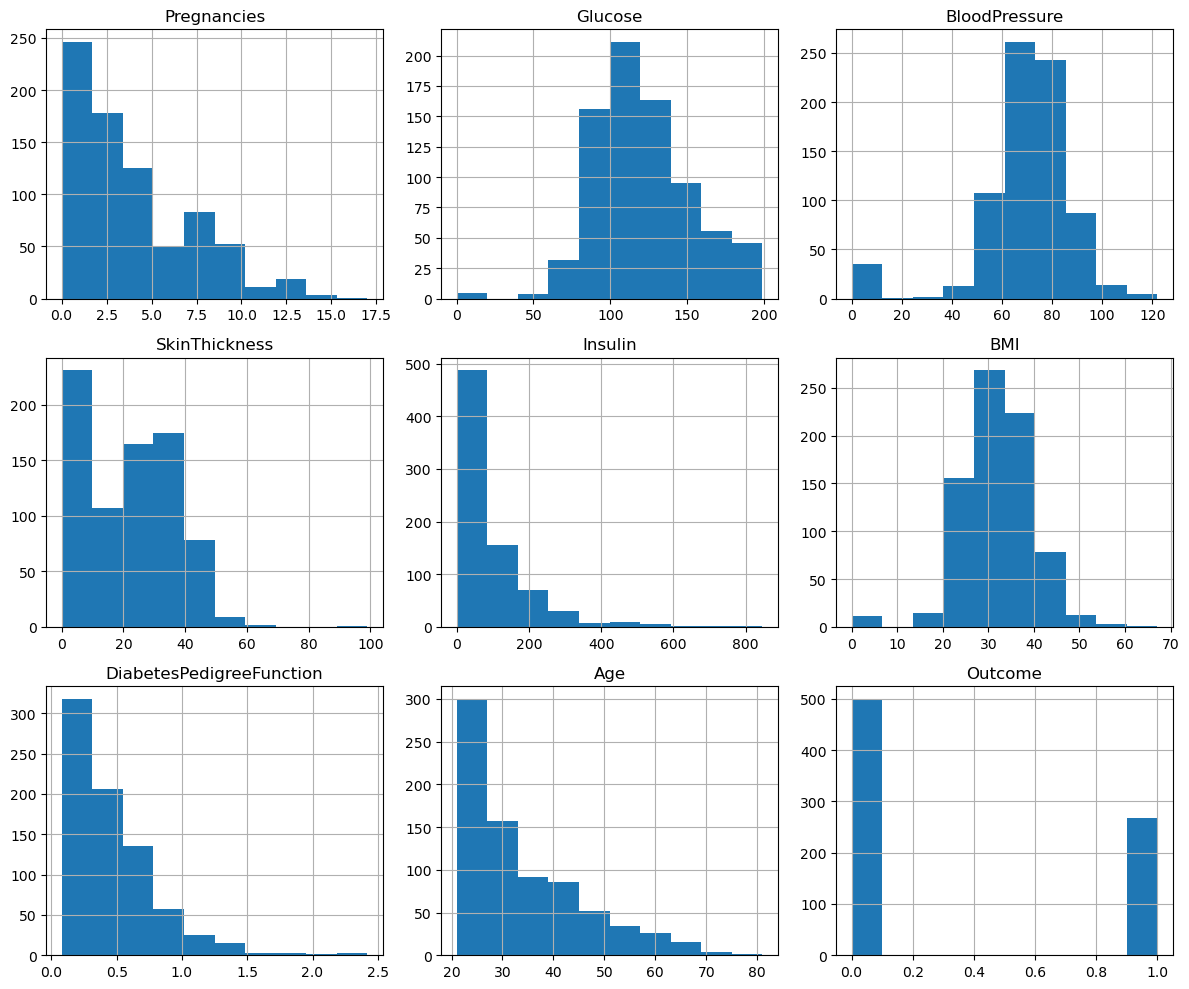

In [9]:
import matplotlib.pyplot as plt

diabetes.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

In [10]:
import numpy as np

cols_with_zero = [
    "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"
]

diabetes[cols_with_zero] = diabetes[cols_with_zero].replace(0, np.nan)

In [11]:
diabetes.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [12]:
diabetes_clean = diabetes.dropna()

print("Przed:", diabetes.shape)
print("Po: ", diabetes_clean.shape)

Przed: (768, 9)
Po:  (392, 9)


### Zadanie 3

Proszę wytrenować zbiór z użyciem algorytmu drzewa decyzyjnego. Proszę pamiętać o odpowienim podziale na zbiór uczący i treningowy. Klasyfikator powinien być trenowany na zbiorze treningowym, a wynik jego skuteczności po trenowaniu obliczany w oparciu o zbiór testowy.

Proszę przygotować wyniki, trenując algorytm z użyciem różnych parametrów - należy przygotować wykresy (oś pionowa określa skuteczność, pozioma wartość parametru) pokazujące jak zmienia się skuteczność działania w zależności od zastosowanych wartości parametrów. Proszę o przygotowanie odpowiedniego porównania (tabela), co można zaobserwować?

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

X = diabetes_clean.drop("Outcome", axis=1)
y = diabetes_clean["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
depths = range(1, 21)
accuracies_depth = []

for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies_depth.append(acc)

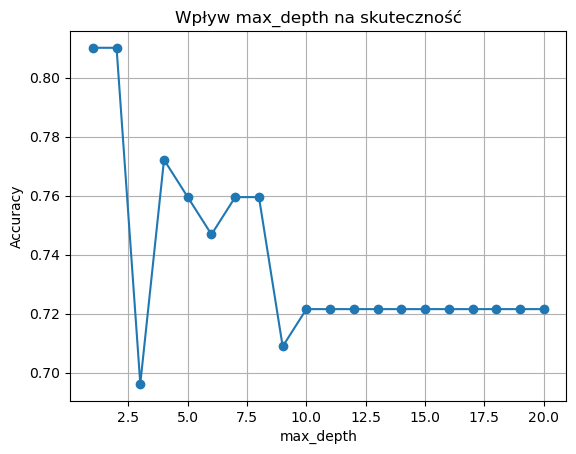

In [15]:
plt.figure()
plt.plot(depths, accuracies_depth, marker='o')
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.title("Wpływ max_depth na skuteczność")
plt.grid(True)
plt.show()

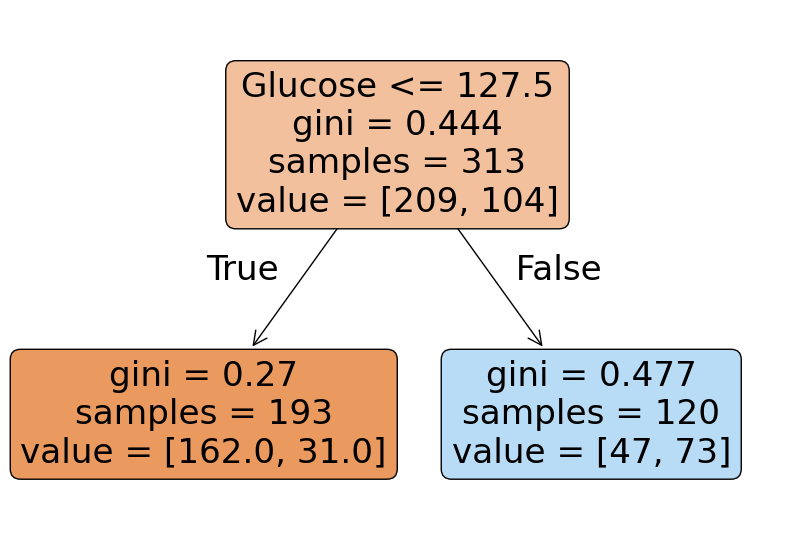

In [16]:
clf = DecisionTreeClassifier(max_depth=1, random_state=42)
clf.fit(X_train, y_train)

plt.figure(figsize=(10, 7))

plot_tree(clf, filled=True, rounded=True, feature_names=X_train.columns)
plt.show()

In [17]:
leaf_sizes = range(1, 21)
accuracies_leaf = []

for leaf in leaf_sizes:
    clf = DecisionTreeClassifier(min_samples_leaf=leaf,random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies_leaf.append(acc)

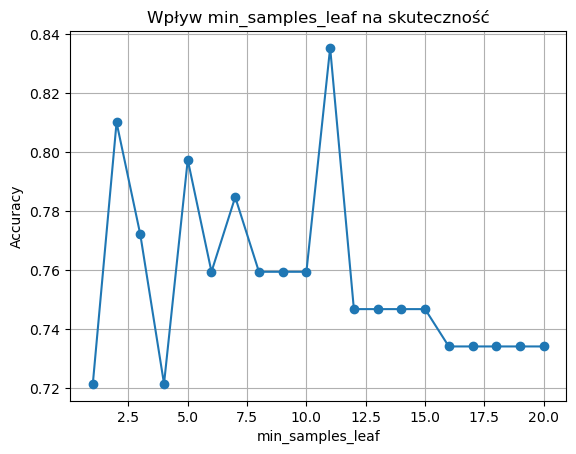

In [18]:
plt.figure()
plt.plot(leaf_sizes, accuracies_leaf, marker='o')
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.title("Wpływ min_samples_leaf na skuteczność")
plt.grid(True)
plt.show()


In [19]:
results_depth = pd.DataFrame({
    "parametr": "max_depth",
    "wartość": depths,
    "accuracy": accuracies_depth
})

results_leaf = pd.DataFrame({
    "parametr": "min_samples_leaf",
    "wartość": leaf_sizes,
    "accuracy": accuracies_leaf
})

results_all = pd.concat([results_depth, results_leaf], ignore_index=True)
results_all.sort_values("accuracy", ascending=False).reset_index(drop=True).head(10)

,parametr,wartość,accuracy
0,min_samples_leaf,11,0.835443
1,max_depth,1,0.810127
2,min_samples_leaf,2,0.810127
3,max_depth,2,0.810127
4,min_samples_leaf,5,0.797468
5,min_samples_leaf,7,0.784810
6,max_depth,4,0.772152
7,min_samples_leaf,3,0.772152
8,min_samples_leaf,10,0.759494
9,min_samples_leaf,6,0.759494


Wnioski:
- na podstawie eksperymentu przeprowadzonego na parametrze max_depth, można zauważyć że największą dokładność (81%) model osiągnął dla wartości 1 (tylko jeden podział ze względu na jedną cechę - glukoza <= 127.5). Dla wartości 2 dokładność jest taka sama, a po dodawaniu następnych podziałów wartość ta spada - model traci zdolność generalizacji.
- w przypadku parametru min_samples_leaf najlepsze wyniki uzyskano dla wartości pośrednich, co oznacza, że ograniczenie minimalnej liczby próbek w liściu poprawia zdolność uogólniania modelu. Zbyt małe wartości prowadzą do niestabilnych wyników, a zbyt duże powodują uproszczenie modelu i spadek skuteczności.

### Zadanie 4

Drzewa decyzyjne mogą również szacować przewdopodobieństwo przynależności danej próbki do określonej klasy. Proszę przeprowadzić odpowiednie trenowanie klasyfikatora i określić jak zmienia się prawdopodobieństwo przynależności różnych próbek. Wystarczy odnaleźć odpowienią właściwość klasyfikatora i pokazać jakie jest zwracane prawdopodobieństwo dla kilku przykładów.

In [30]:
clf = DecisionTreeClassifier(max_depth=1, random_state=42)
clf.fit(X_train, y_train)
proba = clf.predict_proba(X_test)

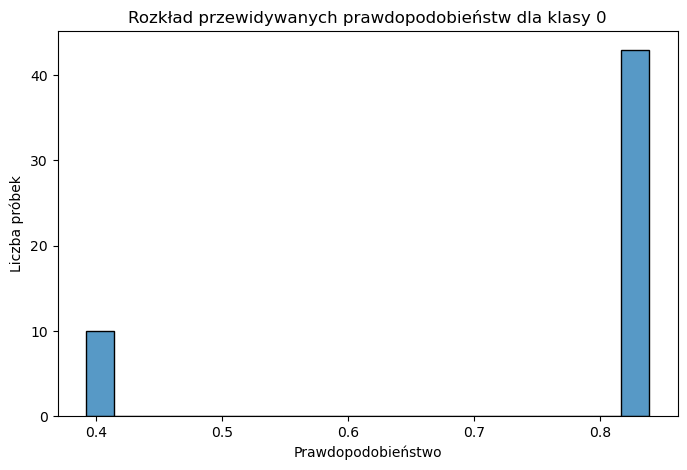

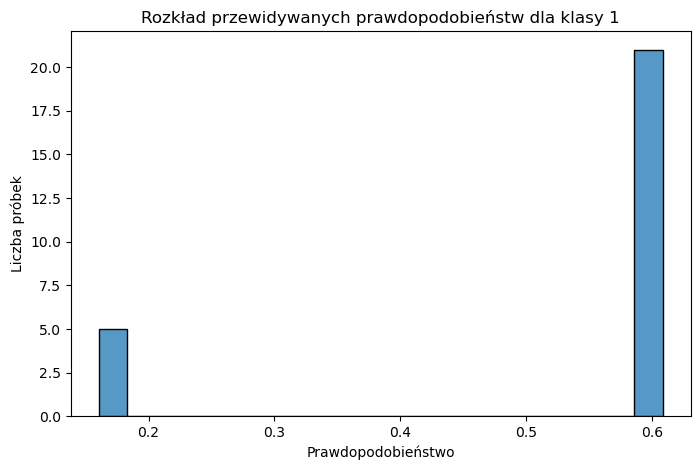

In [31]:
import seaborn as sns

mask = (y_test == 0)
probs_class_1 = proba[mask, 0]

plt.figure(figsize=(8, 5))
sns.histplot(probs_class_1, bins=20, kde=False)
plt.title("Rozkład przewidywanych prawdopodobieństw dla klasy 0")
plt.xlabel("Prawdopodobieństwo")
plt.ylabel("Liczba próbek")
plt.show()

mask = (y_test == 1)
probs_class_1 = proba[mask, 1]

plt.figure(figsize=(8, 5))
sns.histplot(probs_class_1, bins=20, kde=False)
plt.title("Rozkład przewidywanych prawdopodobieństw dla klasy 1")
plt.xlabel("Prawdopodobieństwo")
plt.ylabel("Liczba próbek")
plt.show()

In [33]:
clf = DecisionTreeClassifier(min_samples_leaf=11, random_state=42)
clf.fit(X_train, y_train)
proba = clf.predict_proba(X_test)

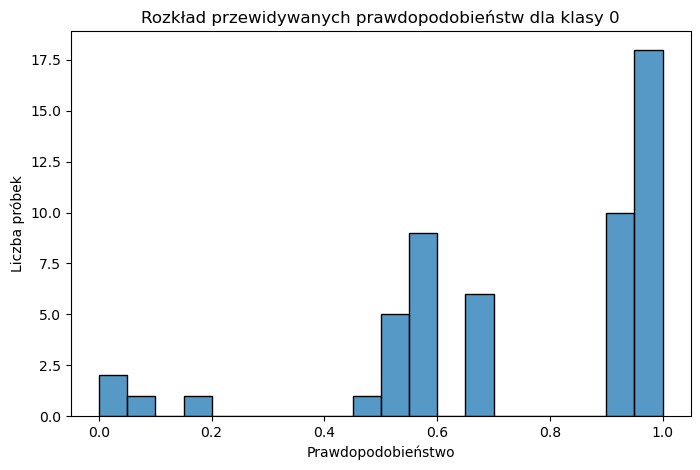

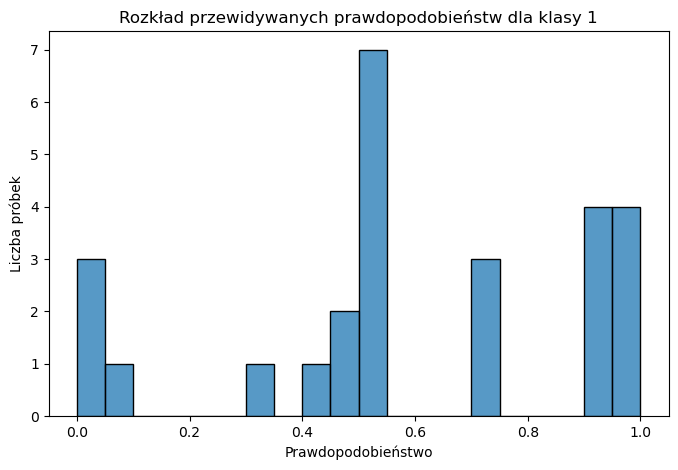

In [34]:
mask = (y_test == 0)
probs_class_1 = proba[mask, 0]

plt.figure(figsize=(8, 5))
sns.histplot(probs_class_1, bins=20, kde=False)
plt.title("Rozkład przewidywanych prawdopodobieństw dla klasy 0")
plt.xlabel("Prawdopodobieństwo")
plt.ylabel("Liczba próbek")
plt.show()

mask = (y_test == 1)
probs_class_1 = proba[mask, 1]

plt.figure(figsize=(8, 5))
sns.histplot(probs_class_1, bins=20, kde=False)
plt.title("Rozkład przewidywanych prawdopodobieństw dla klasy 1")
plt.xlabel("Prawdopodobieństwo")
plt.ylabel("Liczba próbek")
plt.show()

### Zadanie 5

Proszę wyrysować granice decyzyjne dla klasyfikatora drzewa decyzyjnego utworzonego we wcześniejszym zadaniu. Jakie można sformuować wnioski?

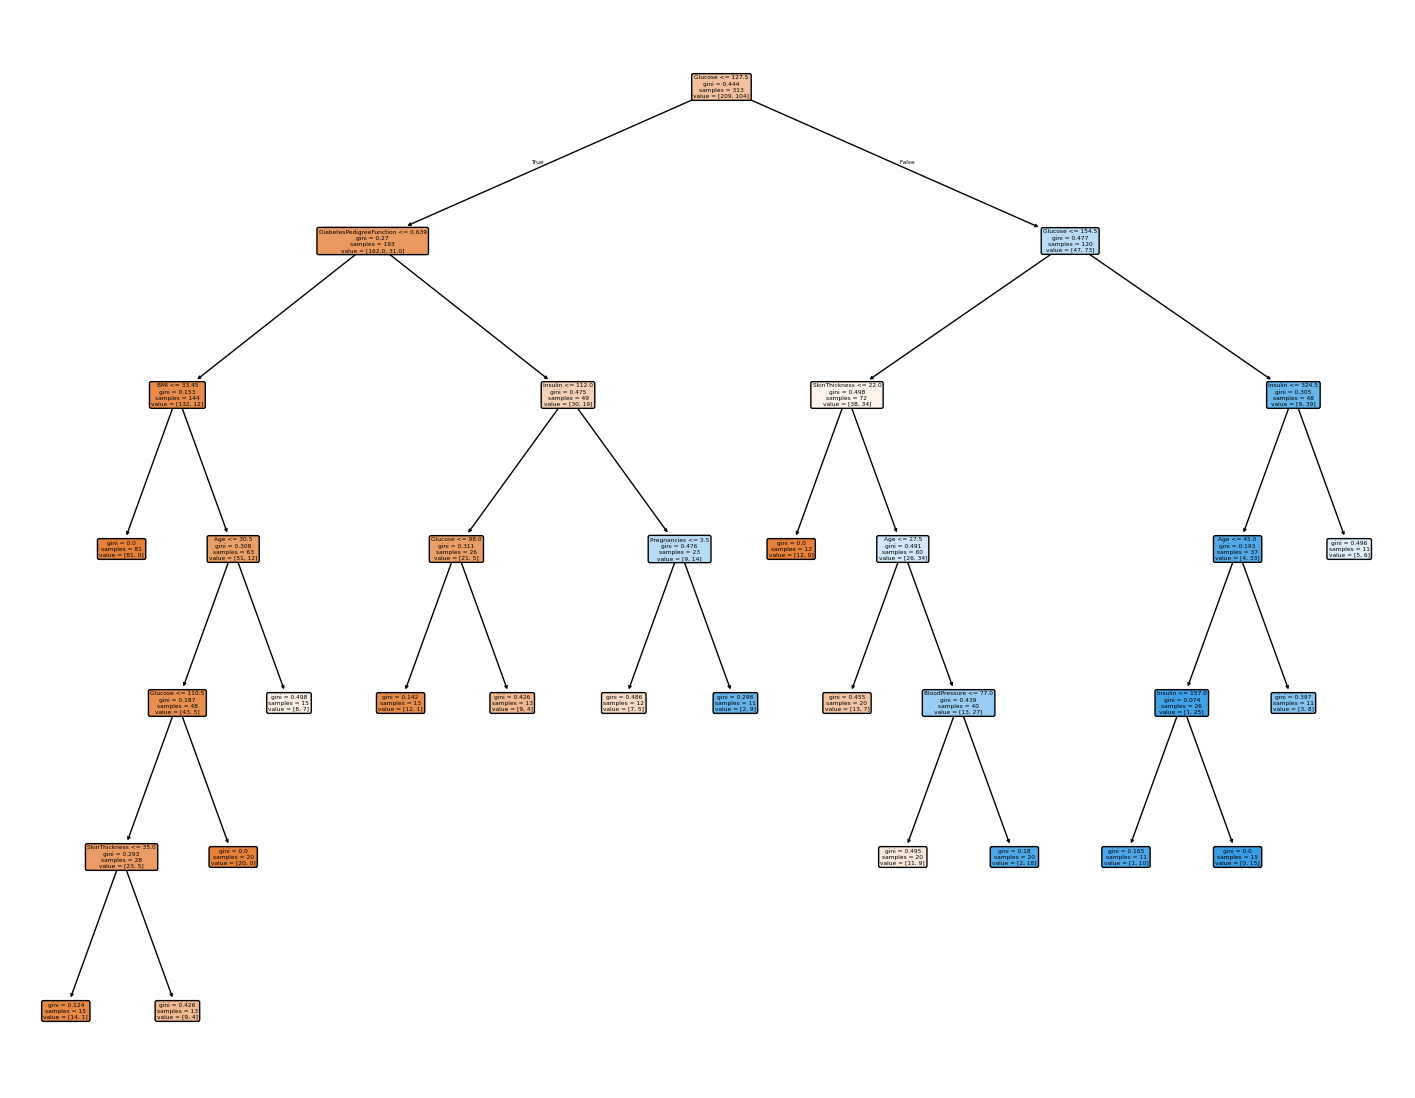

In [43]:
plt.figure(figsize=(18, 14))

plot_tree(clf, filled=True, rounded=True, feature_names=X_train.columns)
plt.show()

Ponieważ model został wytrenowany na więcej niż 2 cechach, zamiast granicy decyzyjnej wygenerowałam wizualizację drzewa decyzyjnego, z którego można wyciągnąć poniższe wnioski:
- najważniejszą cechą (korzeniem) jest glukoza (tak jak w przypadku drzewa max_depth=1)
- dla osób z niższą glukozą kluczowym czynnikiem jest DiabetesPedigreeFunction
- dla osób z wyższą glukozą model ponownie sprawdza poziom glukozy, co sugeruje nieliniową zależność tej cechy od ryzyka
- model znalazł kilka specyficznych reguł pozwalających na idealną segregację podgrup (gini = 0)
- drzewo jest dość głębokie (7 poziomów), co pozwala na bardzo precyzyjne dopasowanie do danych treningowych, ale na samym dole drzewa widać liście zawierające bardzo małą liczbę próbek (11, 13) - może świadczyć o overfittingu

### Zadanie 6

Proszę dokonać optymalizacji paramertrów (min. 3) modelu w oparciu o metodę przeszukiwania siatki: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV

In [48]:
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [2, 5, 10, None],
    'min_samples_split': [10, 15, 20],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=clf, 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='accuracy',
                           verbose=1)

grid_search.fit(X_train, y_train)

print(f"Najlepsze parametry: {grid_search.best_params_}")
print(f"Najlepszy wynik: {grid_search.best_score_:.4f}")

best_model = grid_search.best_estimator_

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Najlepsze parametry: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 10}
Najlepszy wynik: 0.7446


In [50]:
best_model.score(X_test, y_test)

0.7341772151898734

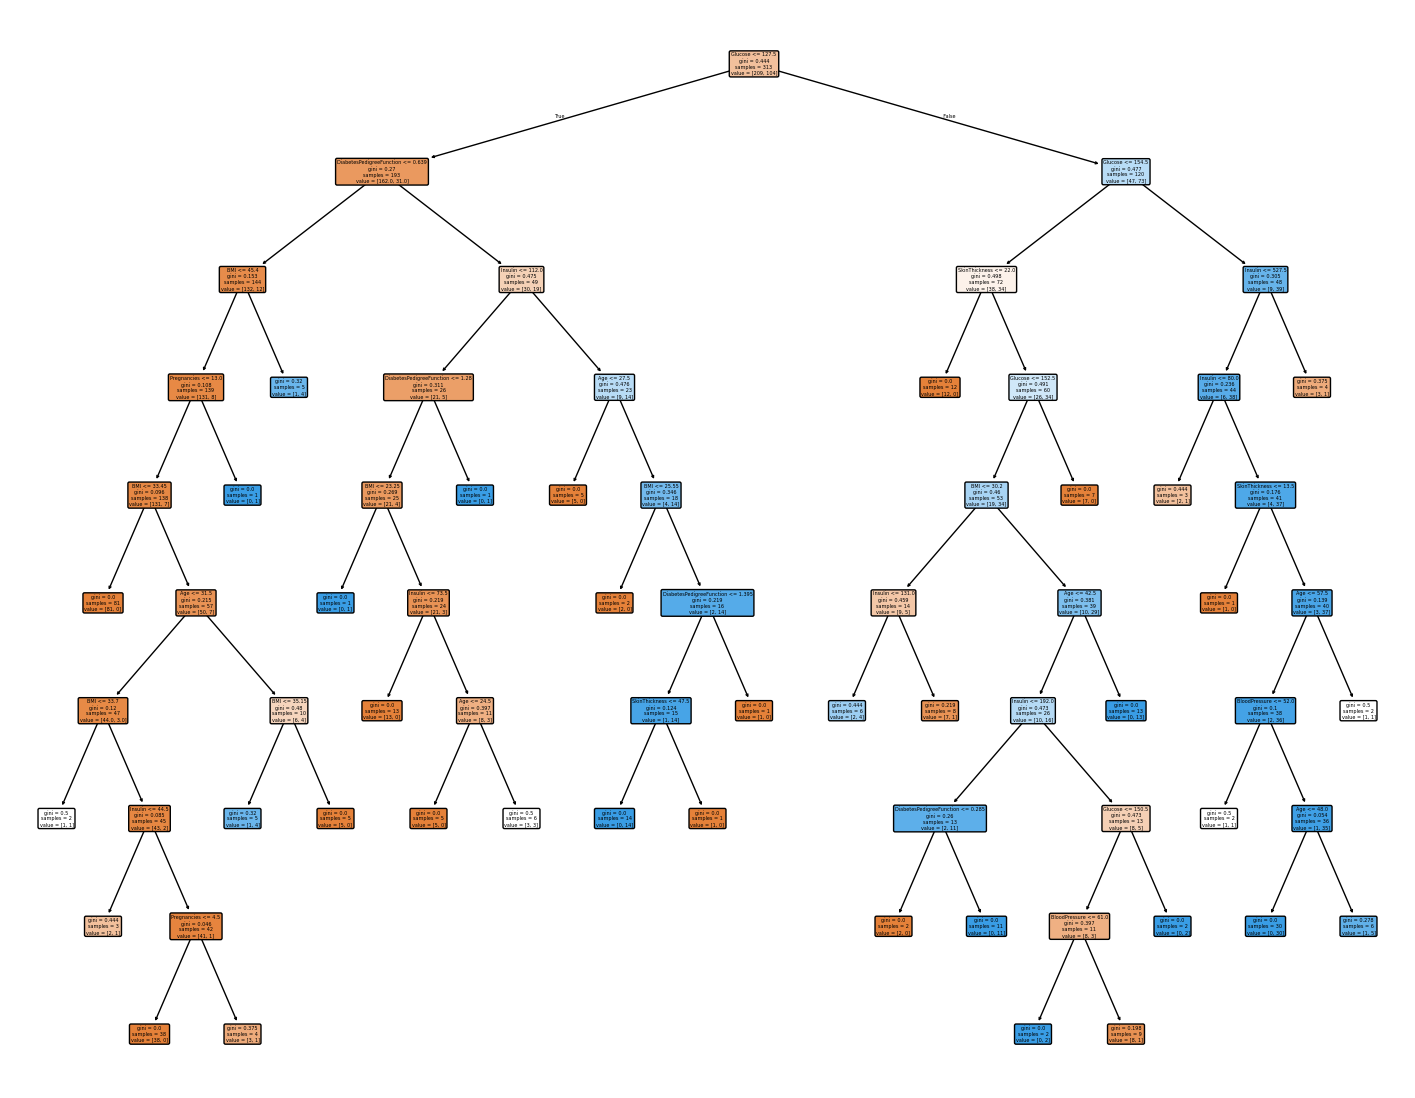

In [49]:
plt.figure(figsize=(18, 14))

plot_tree(best_model, filled=True, rounded=True, feature_names=X_train.columns)
plt.show()